In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
%cd Dataset

/home/aloysius/repos/Code and Dataset/Dataset


/home/aloysius/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
trades = pd.read_csv("login_trades_symbol_updated_tpsl.csv")
trades['reg_date'] = pd.to_datetime(trades['reg_date'], format='%Y-%m-%d %H:%M:%S')
trades['open_time'] = pd.to_datetime(trades['open_time'], format='%Y-%m-%d %H:%M:%S')
trades['close_time'] = pd.to_datetime(trades['close_time'], format='%Y-%m-%d %H:%M:%S')
trades.head()

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,open_price_usd,close_time,close_price_usd,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm,tp_usd,sl_usd
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 17:05:41,1991.3500,2135.902096,2024-02-15 16:05:14,2157.542221,0.0,0.0,1,0.0,0.0,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634,0.0,0.0
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:08:49,1990.3000,2134.775877,2024-02-15 16:05:10,2157.272934,0.0,0.0,1,0.0,0.0,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405,0.0,0.0
2,7062462,Latvia,EUR,2023-12-22 18:51:59,68879706,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:00:10,1995.3800,2140.224634,2024-02-15 14:49:53,2152.985877,0.0,0.0,1,0.0,0.0,-2.25,-2.423588,6.33,6.818360,7988.32,2.723362,0.0,0.0
3,7062462,Latvia,EUR,2023-12-22 18:51:59,68873155,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 16:00:08,2003.2100,2148.623014,2024-02-15 16:05:29,2157.402192,0.0,0.0,1,0.0,0.0,-1.12,-1.206408,-0.30,-0.323145,4006.09,-0.129455,0.0,0.0
4,7060285,Germany,EUR,2023-12-07 16:33:42,68857433,USDCHF,US Dollar vs Swiss Franc,Forex,0,0.03,2024-02-13 12:33:06,0.8795,0.943343,2024-02-13 13:08:17,0.944265,0.0,0.0,1,0.0,0.0,0.00,0.000000,2.72,2.917445,4683.09,0.455422,0.0,0.0


In [4]:
trades['reg_date'] = trades['reg_date'].astype(int) // 10**9
trades['open_time'] = trades['open_time'].astype(int) // 10**9
trades['close_time'] = trades['close_time'].astype(int) // 10**9
label_encoder = preprocessing.LabelEncoder()
trades["country"]= label_encoder.fit_transform(trades["country"])
trades["account_currency"]= label_encoder.fit_transform(trades["account_currency"])
trades["symbol"]= label_encoder.fit_transform(trades["symbol"])
trades["type"]= label_encoder.fit_transform(trades["type"])
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
trades[["volume"]] = scaler.fit_transform(trades[["volume"]])
trades[["open_price_usd"]] = scaler.fit_transform(trades[["open_price_usd"]])
trades[["tp_usd"]] = scaler.fit_transform(trades[["tp_usd"]])
trades[["sl_usd"]] = scaler.fit_transform(trades[["sl_usd"]])
trades[["reg_date"]] = scaler.fit_transform(trades[["reg_date"]])
trades[["open_time"]] = scaler.fit_transform(trades[["open_time"]])
trades.drop(columns= ["description","login","ticket","open_price","close_time", "close_price_usd","commission","commission_usd","swaps","swaps_usd","profit","profit_usd","volume_usd"],inplace=True)
trades = trades[["country","account_currency","reg_date","symbol","type","cmd","volume","open_time","open_price_usd","tp_usd","sl_usd","reason","dpm"]]
trades.head()

,country,account_currency,reg_date,symbol,type,cmd,volume,open_time,open_price_usd,tp_usd,sl_usd,reason,dpm
0,86,3,0.978239,106,4,0,0.000026,0.961509,0.026408,0.0,0.0,1,4.659634
1,86,3,0.978239,106,4,0,0.000052,0.961515,0.026394,0.0,0.0,1,9.961405
2,86,3,0.978239,106,4,0,0.000052,0.961500,0.026461,0.0,0.0,1,2.723362
3,86,3,0.978239,106,4,0,0.000026,0.961402,0.026565,0.0,0.0,1,-0.129455
4,58,3,0.972593,81,2,0,0.000078,0.961062,0.000011,0.0,0.0,1,0.455422


<Axes: >

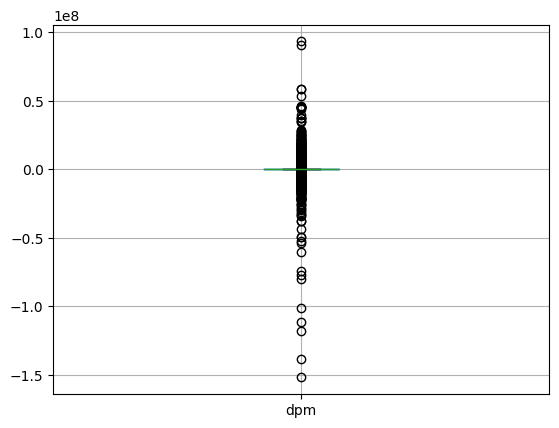

In [5]:
trades.boxplot(column=["dpm"])

<Axes: >

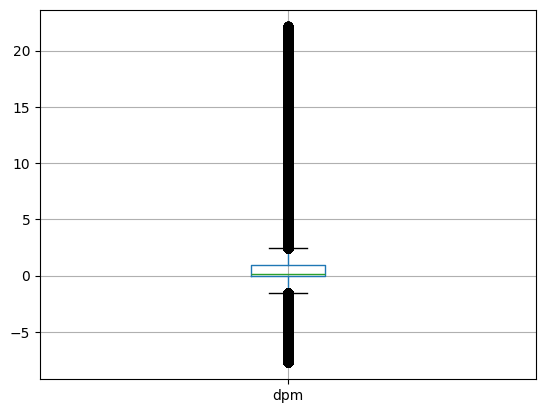

In [6]:
q_low = trades["dpm"].quantile(0.10)
q_hi  = trades["dpm"].quantile(0.90)

df_filtered = trades[(trades["dpm"] < q_hi) & (trades["dpm"] > q_low)]
df_filtered.boxplot(column=["dpm"])

In [7]:
df_filtered.head()

,country,account_currency,reg_date,symbol,type,cmd,volume,open_time,open_price_usd,tp_usd,sl_usd,reason,dpm
0,86,3,0.978239,106,4,0,0.000026,0.961509,0.026408,0.0,0.0,1,4.659634
1,86,3,0.978239,106,4,0,0.000052,0.961515,0.026394,0.0,0.0,1,9.961405
2,86,3,0.978239,106,4,0,0.000052,0.961500,0.026461,0.0,0.0,1,2.723362
3,86,3,0.978239,106,4,0,0.000026,0.961402,0.026565,0.0,0.0,1,-0.129455
4,58,3,0.972593,81,2,0,0.000078,0.961062,0.000011,0.0,0.0,1,0.455422


In [8]:
# sns.violinplot(df_filtered, x="account_currency",y="dpm")
# plt.show()

In [9]:
df_filtered[df_filtered.columns[1:]].corr()['dpm'][:]

account_currency   -0.024966
reg_date           -0.018415
symbol              0.022692
type                0.095621
cmd                -0.002349
volume              0.031955
open_time          -0.017846
open_price_usd      0.070704
tp_usd              0.008543
sl_usd              0.000029
reason              0.051243
dpm                 1.000000
Name: dpm, dtype: float64

In [10]:
X = df_filtered.iloc[:,0:-1]
y = df_filtered.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

## NN

In [11]:
reg = MLPRegressor()
reg.fit(X_train, y_train.values.ravel())
print(reg.score(X_test, y_test))

0.14460813905831627


In [12]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

10.723113120373293

In [13]:
mean_absolute_error(y_test,y_pred)

1.8798619222786241

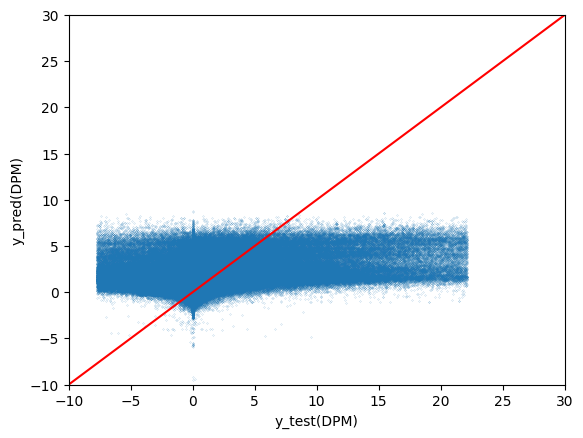

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred,s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

## Linear Regression

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train.values.ravel())
print(reg.score(X_test, y_test))

0.01505216619084282


In [16]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

12.347214793434036

In [17]:
mean_absolute_error(y_test,y_pred)

1.9595071420751353

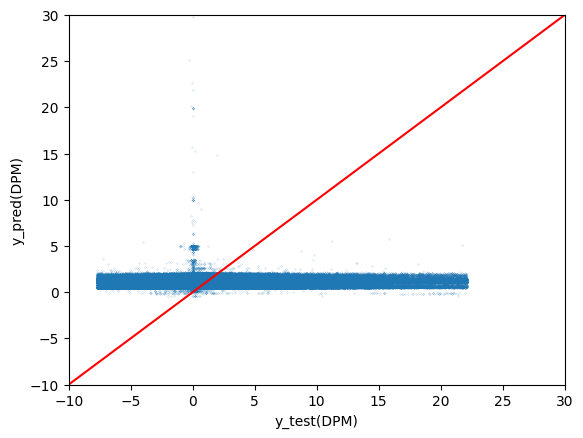

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred,s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

## Random Forest

In [19]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train.values.ravel())
print(reg.score(X_test, y_test))

0.4592749214916342


In [20]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

6.778479488318666

In [21]:
mean_absolute_error(y_test,y_pred)

1.1654114237115138

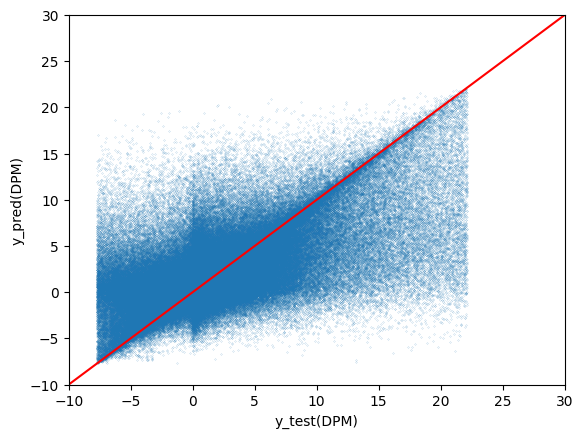

In [22]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

## SVM

In [ ]:
reg = SVR()
reg.fit(X_train, y_train.values.ravel())
print(reg.score(X_test, y_test))

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

## XGBoost

In [11]:
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, y_train.values.ravel())
print(reg.score(X_test, y_test))

0.30058853868954627


In [12]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

8.767757281512043

In [13]:
mean_absolute_error(y_test,y_pred)

1.5429942589570025

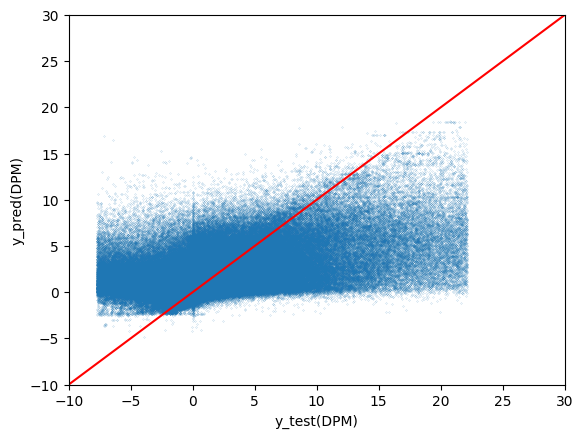

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()

## KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train, y_train.values.ravel())
print(reg.score(X_test, y_test))

0.2578147134357549


In [17]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test,y_pred)

9.303965992081892

In [18]:
mean_absolute_error(y_test,y_pred)

1.529514008160953

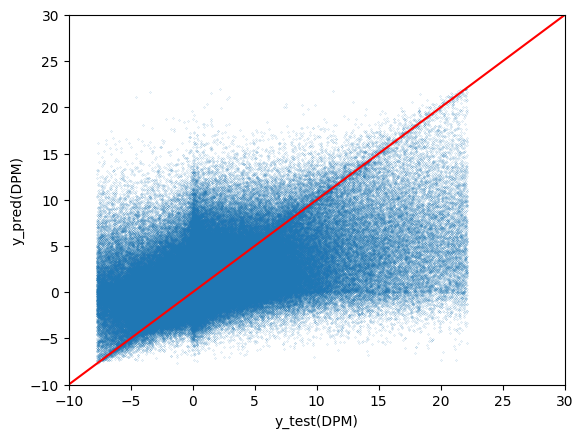

In [19]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=0.01)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('y_test(DPM)') 
plt.ylabel('y_pred(DPM)')
plt.show()